In [39]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [40]:
!pip install liac-arff

In [41]:
!pip install liac-arff pandas numpy matplotlib seaborn scikit-learn requests xgboost


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from scipy.io.arff import loadarff
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [45]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff"
response = requests.get(url)
data, meta = loadarff(StringIO(response.content.decode('utf-8')))
df = pd.DataFrame(data)

In [46]:
# Print available columns to check for 'URL'
print("Dataset Columns:", df.columns)

Dataset Columns: Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


In [47]:
# Ensure 'URL' exists before extracting features
if 'URL' in df.columns:
    def extract_features(df):
        df['url_length'] = df['URL'].apply(lambda x: len(x.decode('utf-8')))
        df['contains_at'] = df['URL'].apply(lambda x: 1 if b'@' in x else 0)
        df['contains_double_slash'] = df['URL'].apply(lambda x: 1 if b'//' in x[7:] else 0)
        df['https'] = df['URL'].apply(lambda x: 1 if x.startswith(b'https') else 0)
        return df

    # Apply feature extraction
    df = extract_features(df)
    df = df.drop(columns=['URL'], errors='ignore')
else:
    print("Warning: 'URL' column not found in dataset. Skipping URL-based features.")

In [48]:
# Convert target column to binary (1 for phishing, 0 for legitimate)
df["Result"] = df["Result"].astype(int).apply(lambda x: 1 if x == -1 else 0)

In [49]:
# Handle missing values (only for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [50]:
# Define features and target variable
X = df.drop("Result", axis=1)
y = df["Result"]

In [51]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [52]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model using optimized XGBoost
model = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, random_state=42)


In [53]:
# Convert object (string) columns to numeric
for col in df.columns:
    if df[col].dtype == object or df[col].dtype.name == 'bytes':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [54]:
# Handle missing values (only for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [55]:
# Define features and target variable
X = df.drop("Result", axis=1)
y = df["Result"]

In [56]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [57]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model using optimized XGBoost
model = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.976857490864799
Precision: 0.9787928221859706
Recall: 0.974817221770918
F1-Score: 0.9768009768009768
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1232
           1       0.98      0.97      0.98      1231

    accuracy                           0.98      2463
   macro avg       0.98      0.98      0.98      2463
weighted avg       0.98      0.98      0.98      2463



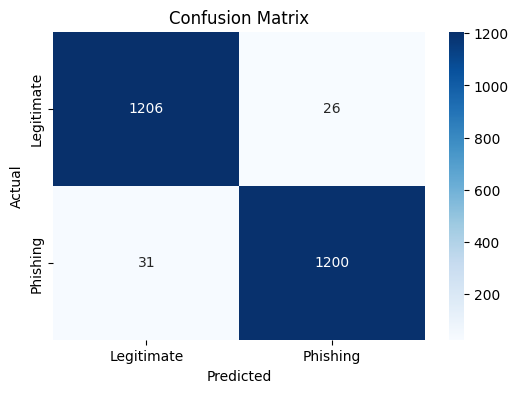

In [58]:
from sklearn.metrics import precision_recall_fscore_support

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Legitimate", "Phishing"],
            yticklabels=["Legitimate", "Phishing"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



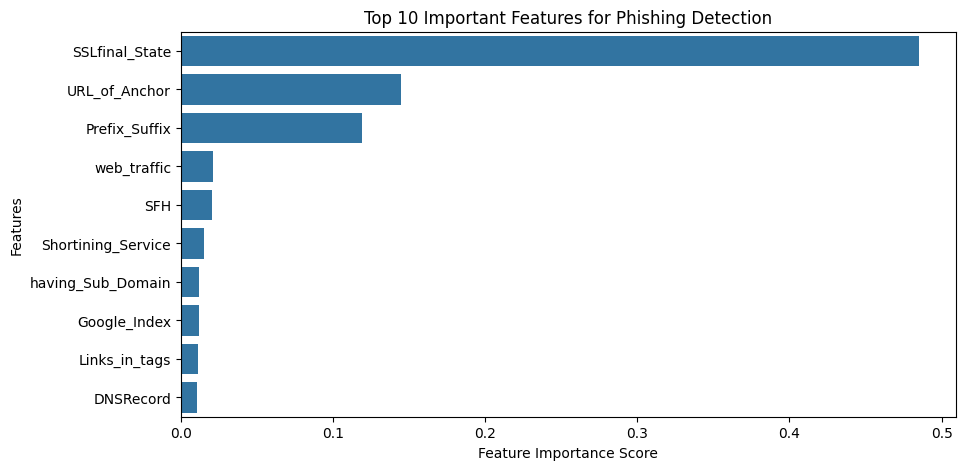

Feature Importances:
 SSLfinal_State                 0.485064
URL_of_Anchor                  0.144647
Prefix_Suffix                  0.119379
web_traffic                    0.020904
SFH                            0.020487
Shortining_Service             0.014967
having_Sub_Domain              0.012115
Google_Index                   0.011841
Links_in_tags                  0.011296
DNSRecord                      0.010425
HTTPS_token                    0.010011
Links_pointing_to_page         0.009683
having_IP_Address              0.009122
Request_URL                    0.008461
Submitting_to_email            0.008334
Favicon                        0.008309
Iframe                         0.008136
RightClick                     0.007999
on_mouseover                   0.007918
port                           0.007886
URL_Length                     0.007792
double_slash_redirecting       0.007732
Domain_registeration_length    0.007692
popUpWidnow                    0.007537
age_of_domain     

In [59]:
# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Ensure feature importance is not all zeros
if feature_importance.sum() == 0:
    print("Feature importance values are all zero! Model might not be learning.")

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features for Phishing Detection")
plt.show()

# Print feature importance values
print("Feature Importances:\n", feature_importance)